In [1]:
import pandas as pd
import statistics
df = pd.read_csv('data/wine_cleared.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


Аргумент `method`, функции `df.corr()`, указывает на название используемого метода расчёта корреляции: `'pearson'` — корреляция Пирсона, `'kendall'` — корреляция Кендалла, `'spearman'` — корреляция Спирмена. Каждый метод может быть применён для разных типов данных. Давайте разберёмся, чем отличаются эти методы и для каких типов данных применять каждый из них.

### Корреляция Пирсона

Рассчитав в прошлом юните коэффициент корреляции между `point` и `price`, мы использовали `df.corr()`. Согласно документации, если не указать `method`, по умолчанию используется корреляция `Пирсона`. Верно ли это для наших признаков?

> Коэффициент корреляции Пирсона используется для вычисления `линейной взаимосвязи` между признаками. 

`Линейная взаимосвязь` — вид связи между признаками, в котором изменение одного признака $x_1$ всегда приводит к изменению другого признака $x_2$ на величину, пропорциональную изменению $x_1$, в соответствии с правилом: $x_2 = ax_1+b$ (уравнение прямой), где $a$ и $b$ — некоторые коэффициенты.


<center><img src='img/dst-eda-2-5.png' width=50% height=50%></center>
<center>Графическая интерпретация выражения «время от времени». Источник: Пикабу</center>

Определить существование линейной связи в паре признаков эмпирическим путем можно, если вы можете формулировать фразу про признаки: «С уменьшением/увеличением признака 1 уменьшается/увеличивается признак 2 в соответствии с некоторым уравнением прямой». 

Например, с увеличением возраста заёмщика уменьшается количество дней просрочки по кредиту. 

<center><img src='img/dst-eda-2-6.png' width=50% height=50%></center>
<center>Линейная зависимость между возрастом и просрочкой выплаты. Источник: Хабр</center>

> Более точной является визуализация зависимости признаков. С этим подходом мы подробнее познакомимся в следующем юните, посвящённом визуализации связей между признаками.

Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

#### нормальное распределение

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать `нормальным распределением`. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

> Если признак является совокупностью очень редких событий, например аварии на дорогах, то распределение признака нормальным не будет.

С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый `q-q plot`. Подробнее о принципе построения данного графика советуем прочитать [здесь](https://habr.com/ru/post/578754/).

<center><img src='img/dst-eda-2-7.png'><img src='img/dst-eda-2-8.png'></center>
<center>Cхематичное изображение нормального распределения, график <b>q-q plot</b>.</center>

На гистограмме распределение должно напоминать колокол (левый график на рисунке), а `q-q plot` должен напоминать прямую линию (правый график на рисунке).

>  Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом `stats` статистических распределений и функций, а также знакомой нам библиотекой `matplotlib` для построения графиков.

Код для построения графиков:

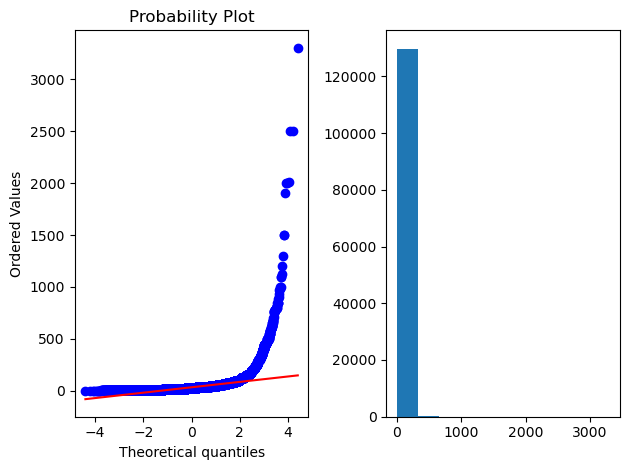

In [4]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Кажется, признак распределён ненормально, так как `q-q plot` имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.

> Такой признак при анализе `Пирсоном` может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований, которые вы освоите позже, в юнитах про разведывательный анализ данных.

####vИтак, что мы узнали в этом юните?

- Корреляция между непрерывными признаками, которые имеют близкое к нормальному распределение, может быть рассчитана с использованием стандартной корреляции Пирсона. 
- Для категориальных данных используются методы ранговой корреляции, например Спирмена и Кендалла, которые будут изучены в следующем юните. 
- Для непрерывных переменных, имеющих большое количество выбросов или распределённых ненормально, могут использоваться методы по устранению выбросов и нормализации данных, которые будут изучены далее в курсе. Также могут быть использованы методы ранговой корреляции.
- В следующем юните вы познакомитесь c другими типами корреляции: Спирмена, Кендалла и Мэтьюса.
